In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from collections import defaultdict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
path = "C:\\Lachin\\DataSets\\Dataset 1\\archive (1)\\Raisin_Dataset\\Raisin_Dataset.xlsx"
data = pd.read_excel(path)

In [4]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [5]:
print("Shape of tha data: {}".format(data.shape))

Shape of tha data: (900, 8)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [7]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


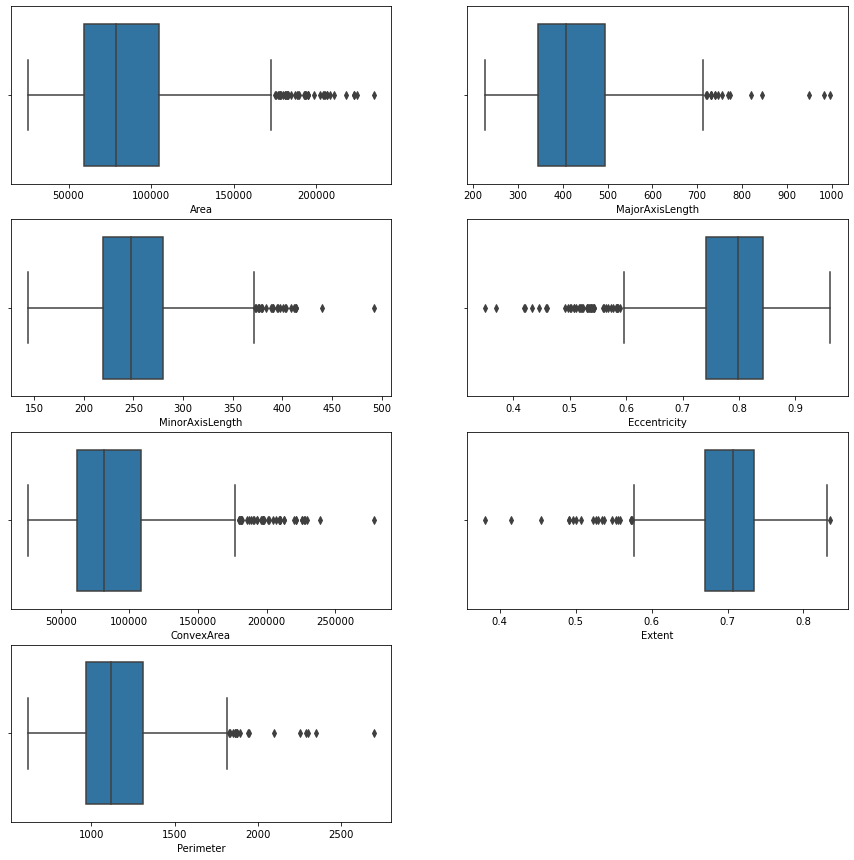

In [8]:
plt.figure(figsize = (15,15))
for index,columns in enumerate(data.columns):
    if columns == "Class":
        continue
    plt.subplot(4,2, index+1)
    sns.boxplot(x = data[columns])
    
#Eventhough the outliers are visible, they are not removed here

In [9]:
#missing values
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [10]:
#duplicates
data.duplicated().sum()

0

### Data Analysis

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

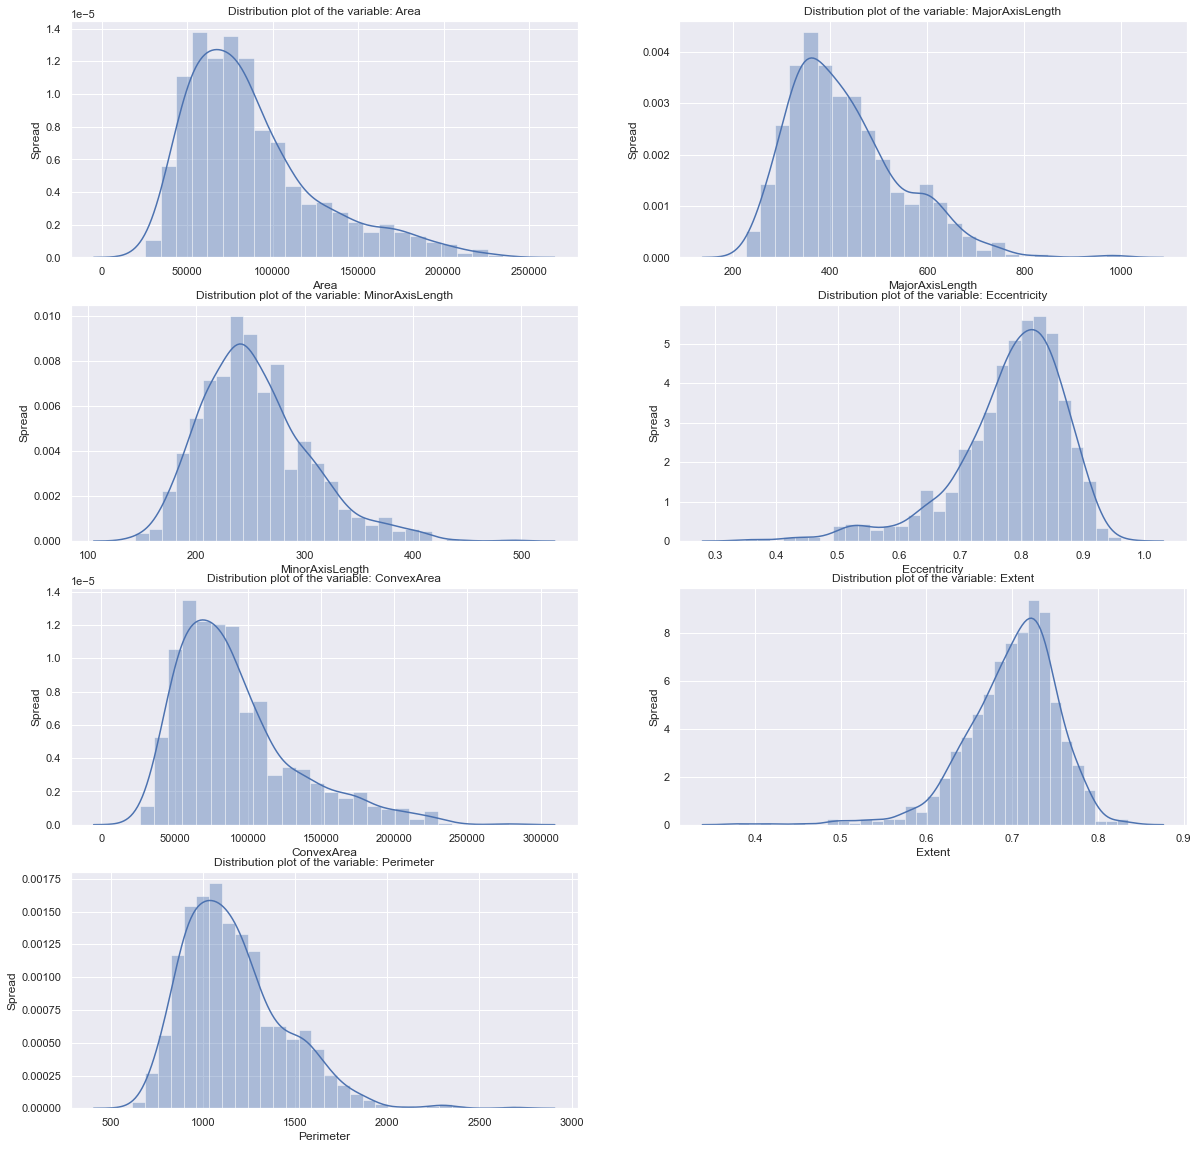

In [11]:
sns.set_theme()
plt.figure(figsize = (20,20))
for index,columns in enumerate(data.columns):
    if columns == "Class":
        continue
    plt.subplot(4,2, index+1)
    sns.distplot(x =data[columns], kde=True)
    plt.xlabel(f"{columns}")
    plt.ylabel("Spread")
    plt.title("Distribution plot of the variable: {}".format(columns))

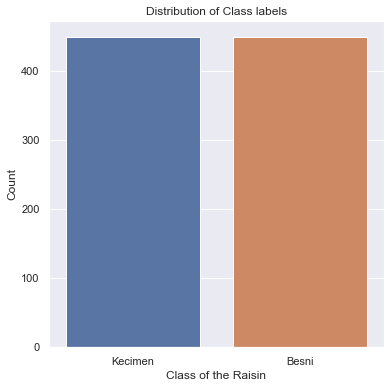

In [12]:
plt.figure(figsize = (6,6))
sns.countplot(x = data['Class'])
plt.xlabel("Class of the Raisin")
plt.ylabel("Count")
plt.title("Distribution of Class labels");

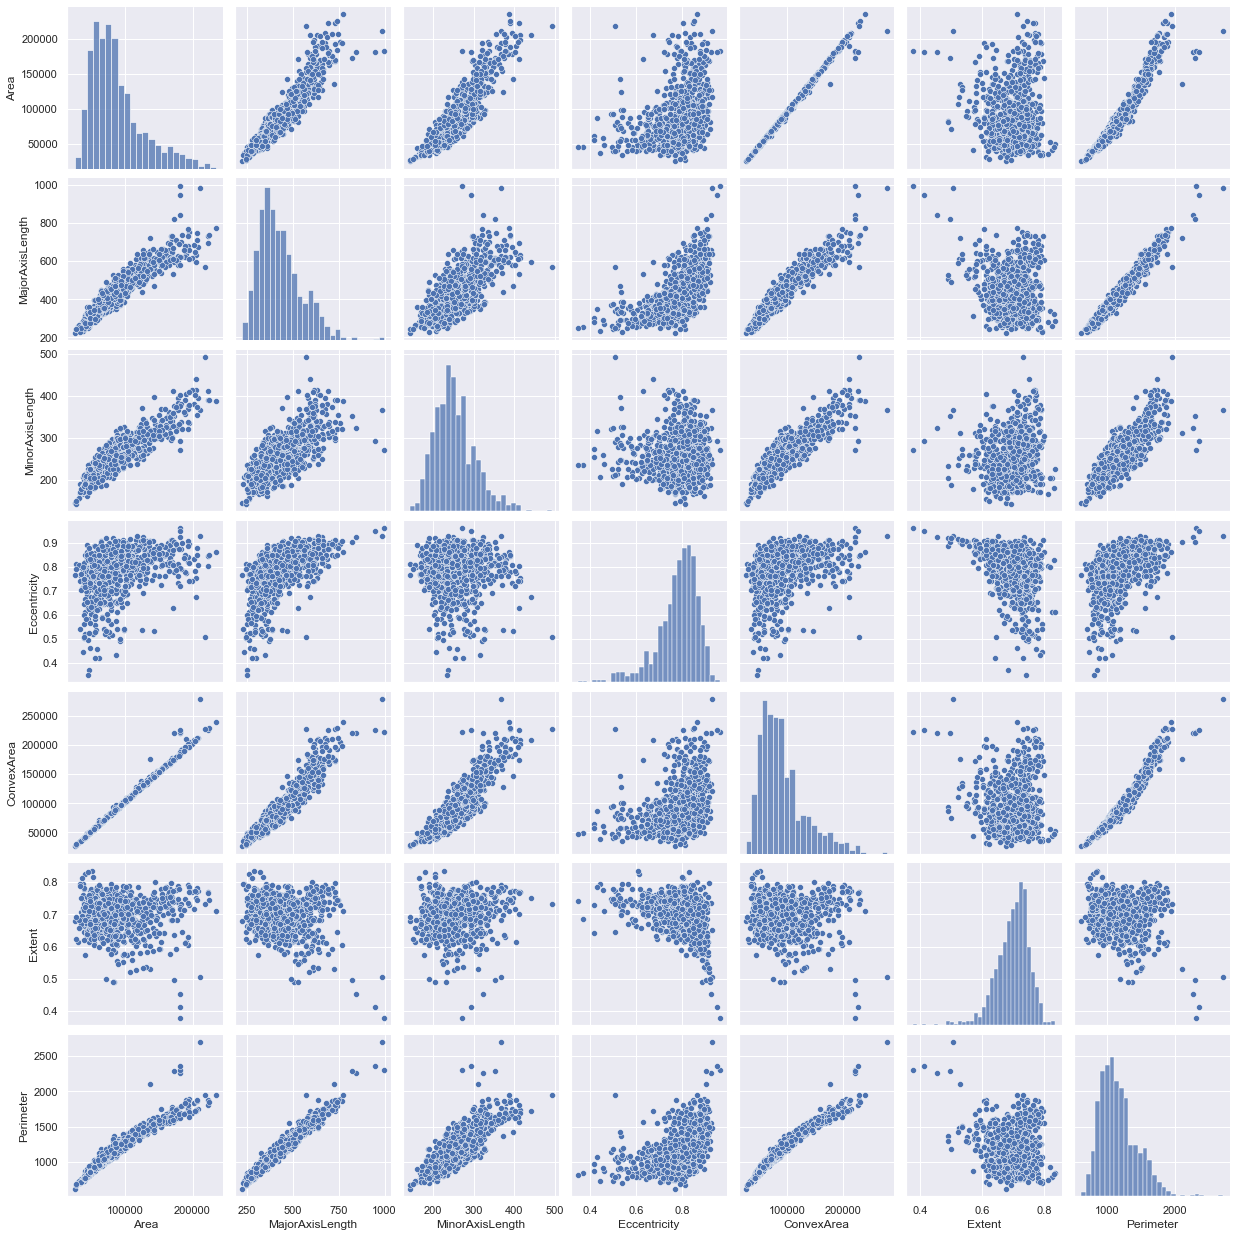

In [13]:
numeric_data = data.select_dtypes(include = ['int64', 'float64'])
sns.pairplot(numeric_data)

In [14]:
#Encoding the numeric variables
lbl_ecd = LabelEncoder()
labels = lbl_ecd.fit_transform(data['Class'])
data['Class'] = labels

In [15]:
with open("Label_encoder.pikle",'wb') as f:
    pickle.dump(lbl_ecd, f, pickle.HIGHEST_PROTOCOL)

In [16]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


In [17]:
#correlation values
data.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352,-0.625715
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978,-0.673194
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417,-0.503102
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845,-0.438500
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612,-0.625567
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449,0.154689
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000,-0.665981
Class,-0.625715,-0.673194,-0.503102,-0.438500,-0.625567,0.154689,-0.665981,1.000000


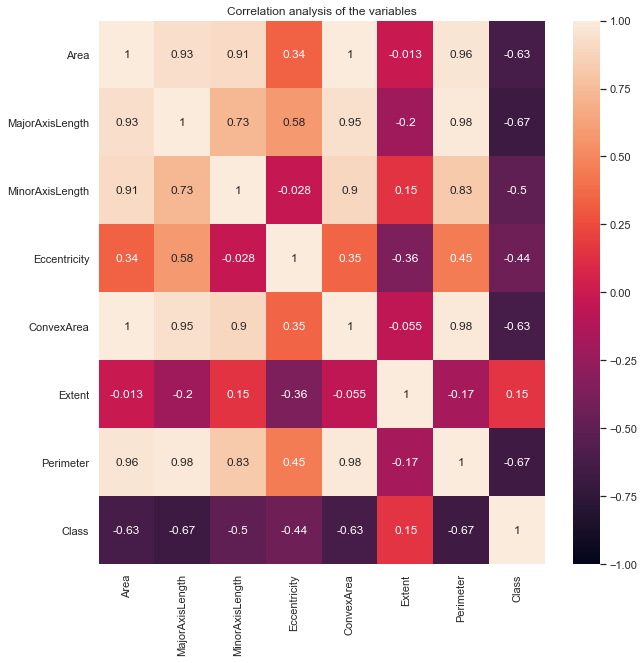

In [18]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)
plt.title("Correlation analysis of the variables");

### Model building

In [19]:
X = data.drop('Class', axis = 1)
Y = data['Class']

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [20]:
def classifier(algo,
              x_train = x_train,
              x_test = x_test,
              y_train = y_train,
              y_test = y_test,
              preprocessing = False):
    global models
    models = defaultdict(list)
    if preprocessing:
        #standardizing the data
        stc = StandardScaler()
        x_train_stc = stc.fit_transform(x_train)
        x_test_stc = stc.fit_transform(x_test)
        
        #model building
        model = algo
        models['Model'].append(str(algo))
        model.fit(x_train_stc,y_train)
        y_pred_stc = model.predict(x_test_stc)
        print("Accuracy of the trainig data:{}\n".format(accuracy_score(y_train, model.predict(x_train_stc))))
        print("\nAccuracy of the testing data: {}\n".format(accuracy_score(y_test,y_pred_stc)))
        models['Testing Accuracy'].append(accuracy_score(y_test,y_pred_stc))
        
        #Visualization
        print("\n Confusion Matrix")
        plt.figure(figsize = (6,6))
        sns.heatmap(confusion_matrix(y_test,y_pred_stc), annot = True, fmt = 'g')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix in a HeatMap")
        plt.show()
        
        
        #Classification report
        print("\n Classification Report:\n")
        print(classification_report(y_test,y_pred_stc))
        
    else:
        model1 = algo
        models['Model'].append(str(algo))
        model1.fit(x_train,y_train)
        y_pred = model1.predict(x_test)
        
        print("Accuracy of the trainig data:{}\n".format(accuracy_score(y_train, model1.predict(x_train))))
        print("\nAccuracy of the testing data: {}\n".format(accuracy_score(y_test,y_pred)))
        models['Testing Accuracy'].append(accuracy_score(y_test,y_pred))
        
        #Visualization
        print("\n Confusion Mattrix")
        plt.figure(figsize = (6,6))
        sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'g')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix in a HeatMap")
        plt.show()
        
        
        #Classification report
        print("\n Classification Report:\n")
        print(classification_report(y_test,y_pred))
        
        

Accuracy of the trainig data:0.8583333333333333


Accuracy of the testing data: 0.9055555555555556


 Confusion Mattrix


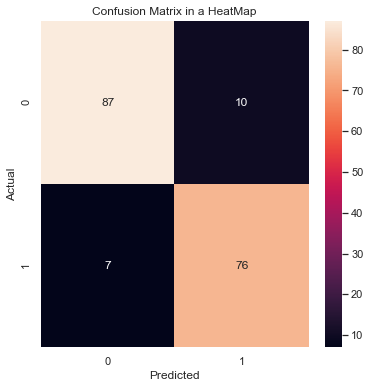


 Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        97
           1       0.88      0.92      0.90        83

    accuracy                           0.91       180
   macro avg       0.90      0.91      0.91       180
weighted avg       0.91      0.91      0.91       180



In [21]:
#Logistic Regression
classifier(LogisticRegression())